 dataset is taken from "https://www.kaggle.com/ronitf/heart-disease-uci"

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn

In [3]:
#1. load the data set

In [4]:
data = pd.read_csv("/home/ramchowdary/Desktop/hot prediction/dataset.csv")

In [5]:
# description and information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# test any null values with in the data
data.isnull().values.any()
# there is no null values

False

In [8]:
# correalation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


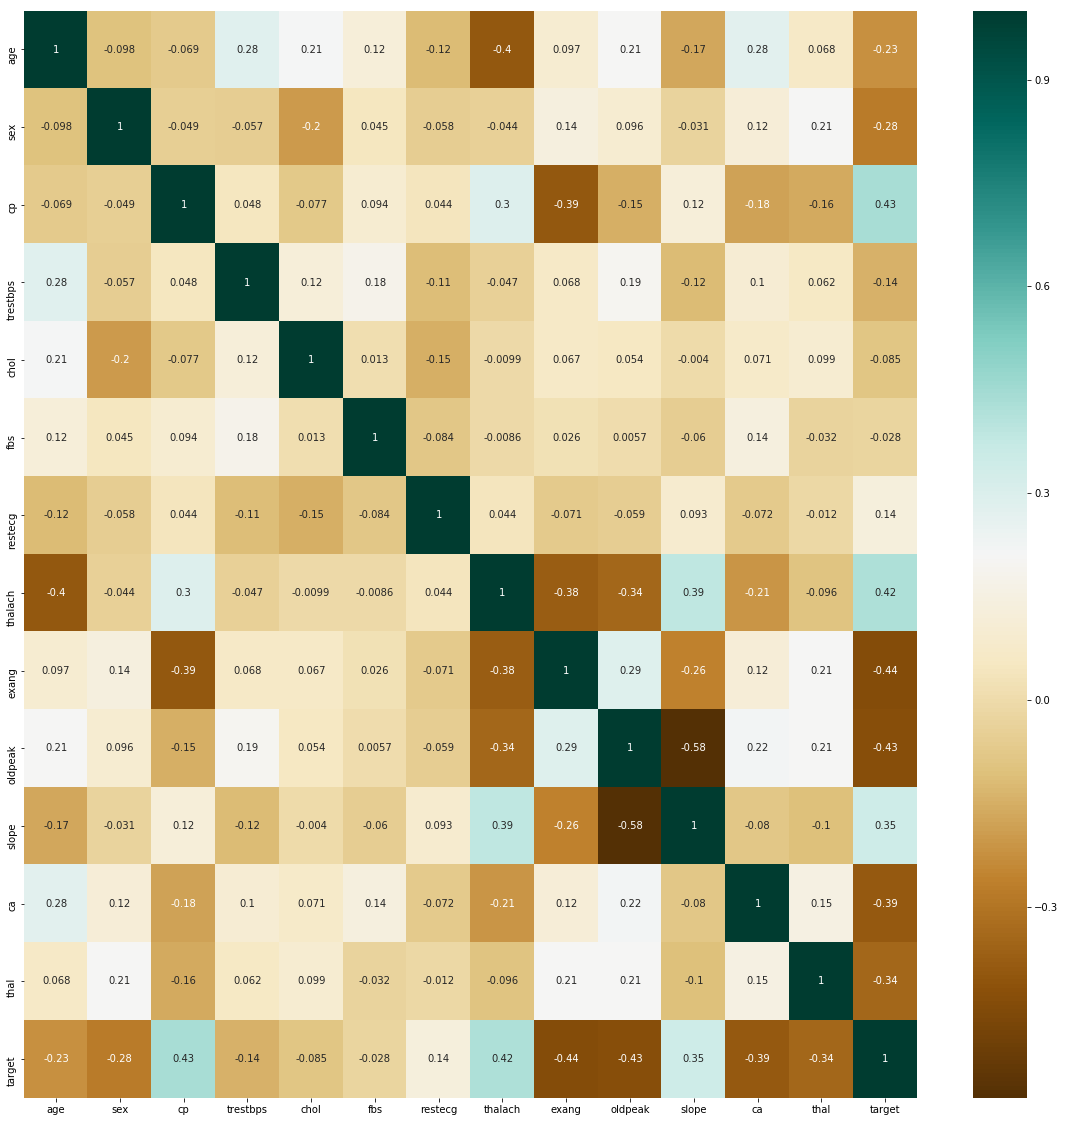

In [9]:
corr_mat = data.corr()
top_corr_features = corr_mat.index
#plot the figure
plt.figure(figsize=(20,20))
#plot heatmap
grah = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='BrBG')

In [10]:
# observe the difference between data,datafeatures

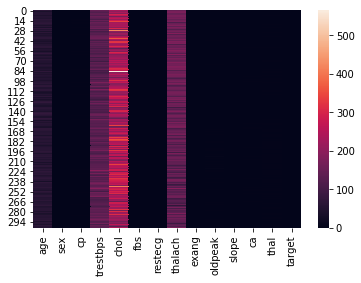

In [11]:
sns.heatmap(data)

In [12]:
print(top_corr_features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


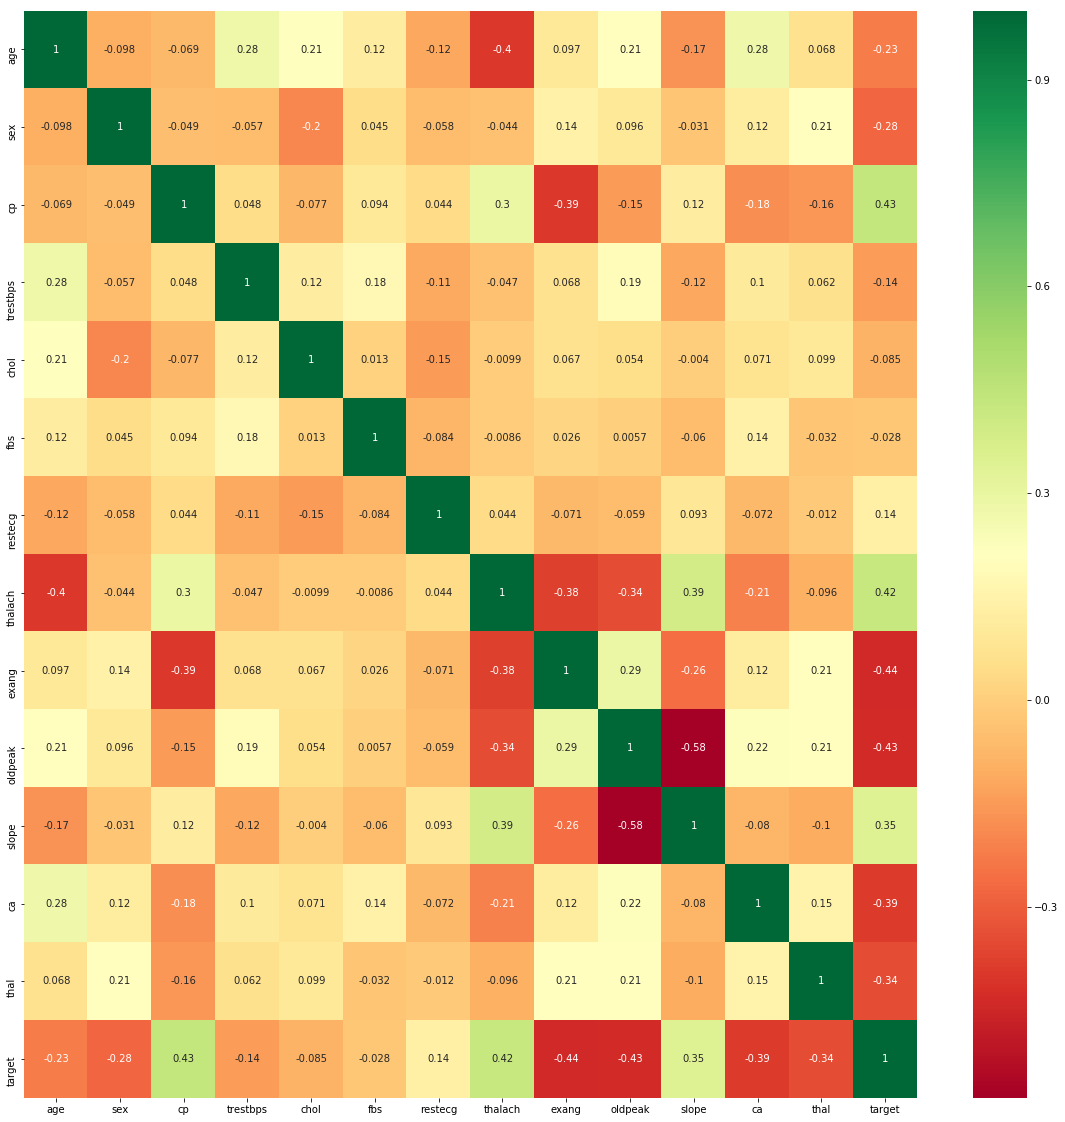

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
print(g)

AxesSubplot(0.125,0.125;0.62x0.755)


In [15]:
grah

In [33]:
# draw the histograms to understand the features properly

<Figure size 1440x1440 with 0 Axes>

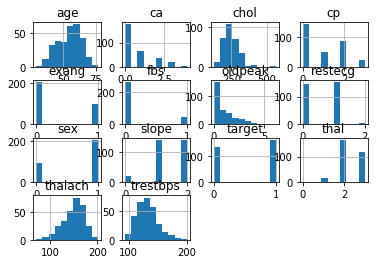

In [16]:
plt.figure(figsize=(20,20))

data.hist()
plt.show()

In [37]:
 # check the given dataset is balanced or Not

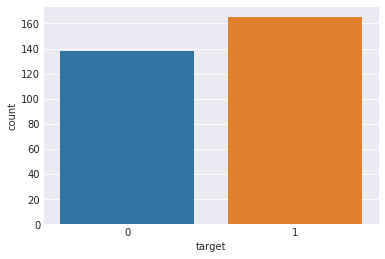

In [18]:
sns.set_style("darkgrid")
sns.countplot(x="target",data = data)
plt.show()

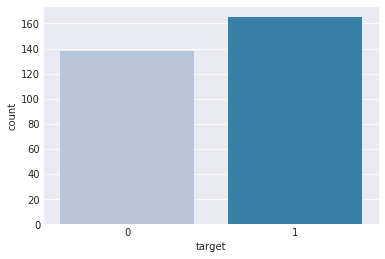

In [19]:
sns.countplot(x='target',data=data,palette="PuBu")
plt.show()

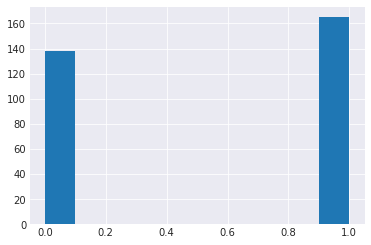

In [20]:
data['target'].hist() # draw he histogram to indentify the both are equal or not

In [22]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [23]:
# data pre processing

-> after exploring the dataset, I observed that i need to convert some categorical variables into Dummy variables and scale all the values.

-> before training the machine learning models

-> get_dummies method to create dummy columns for categorical variables.

@ categorical columns : 'sex','cp','fbs','restecg','exang','slope','ca','thal'
    

In [24]:
# getdumies:

new_dataset = pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [25]:
new_dataset.head(3)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


-> standardisation: converting the all values into the small values.
-> without standardization model not gives the good performance.
@ integer columns = 'age','trestbps','chol','thalach','oldpeak'




In [34]:
#from sklearn.preprocesssing import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scled_columns = ['age','trestbps','chol','thalach','oldpeak']
new_dataset[scled_columns] = sc.fit_transform(new_dataset[scled_columns])

In [36]:
# now 
new_dataset.head(5)
# observe the values once in the scaled columns

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# model selection:
-> dependent column  is target column it represents the patient having heart disease or not.

-> independent variables are the symmtoms to getting the heart diseases.


In [84]:
# target values are stored in Y.
# features are stored in x.


from sklearn.model_selection import train_test_split
y = new_dataset['target'] # target column
x  = new_dataset.drop(['target'],axis=1) # removing the target and stored into X.

In [86]:
x.shape

(303, 30)

In [87]:
y.shape

(303,)

In [88]:
# print the target column
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [90]:
print(x)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338      0      1     0   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573      0      1     0   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912      1      0     0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705      0      1     0   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244      1      0     1   
5    0.290464  0.478391 -1.048678 -0.072018 -0.551783      0      1     1   
6    0.180175  0.478391  0.922521  0.146634  0.224643      1      0     0   
7   -1.143291 -0.663867  0.323431  1.021244 -0.896862      0      1     0   
8   -0.260980  2.306004 -0.913400  0.540209 -0.465514      0      1     0   
9    0.290464  1.049520 -1.512490  1.064975  0.483451      0      1     0   
10  -0.040403  0.478391 -0.140381  0.452748  0.138373      0      1     1   
11  -0.702136 -0.092738  0.555337 -0.465593 -0.724323      1      0     0   

# k-nearest neighbours

-> k nearest neigbor technique is one of the supervised algorithm.

-> hyper parameter in thi technique is k value .

-> k value must be taken odd values otherwise you get some problems.

-> To find the correct k value we are using the cross_validation technique.

-> uses the k- cross validation.

-> find the scores of each k value

In [93]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=k)
from sklearn.model_selection import cross_val_score
Knn_score = []
for k in range(1,25,2):
    score = cross_val_score(KN,x,y,cv=10)
    Knn_score.append(score.mean())
    

In [94]:
Knn_score
# my model having the 0.82 accuracy

[0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477,
 0.8274378939562477]

-> finally my model gives the 82% accuracy

-> my model classifying  82 samples are correctly out of 100 samples

In [ ]:
# des